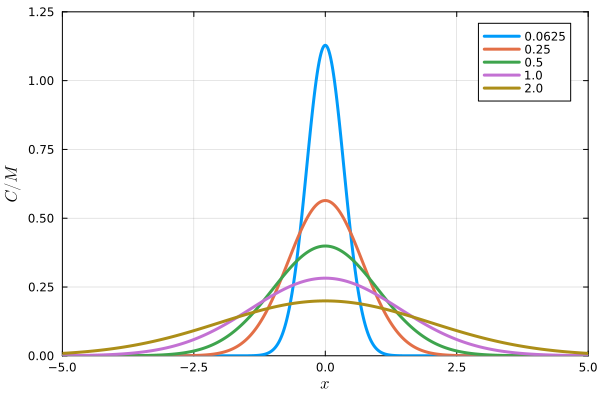

In [3]:
###############################################################################
#  Fig 2.1  –  Instantaneous plane source: C/M = (2√π dt)⁻¹ exp(−x²/4dt)
###############################################################################
using Plots              # GR backend
using SpecialFunctions   # exp()
using LaTeXStrings

# -------------------- dimensionless grid --------------------------------------
x = range(-5.0, 5.0; length = 800)      # −5 ≤ x ≤ 5

# -------------------- dimensionless solution ----------------------------------
"""
    C_over_M(x, dt)

Gaussian solution of the instantaneous plane source with
    dt = D t   (dimensionless time).
"""
function C_over_M(x, dt)
    inv_norm = 1 / (2 * sqrt(pi * dt))
    return inv_norm .* exp.( .-(x.^2) ./ (4dt) )
end

# -------------------- curves to plot ------------------------------------------
dt_vals = [1/16, 0.25, 0.5, 1.0, 2.0]        # the values requested

# replace 0 with a tiny dt_ε for plotting
dt_plot  = map(dt -> dt == 0 ? 1e-4 : dt, dt_vals)
curves   = [C_over_M(x, dt) for dt in dt_plot]

# -------------------- build the figure ----------------------------------------
plt = plot(
    xlabel = L"x",
    ylabel = L"C/M",
    xlim = (-5, 5),
    ylim = (0, 1.25),
    framestyle = :box,
    legend = :topright,
    linewidth = 3,
)

# --- curves -------------------------------------------------------------------
for (idx, dt) in enumerate(dt_vals)
    plot!(plt, x, curves[idx];
          label = string(dt),        # “0”, “0.25”, …
          linewidth = 3)
end

# -------------------- output ---------------------------------------------------
savefig(plt, "Crank_Fig2_6.pdf")     # delete if not needed
display(plt)